In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data preparation
rng = np.random.default_rng(seed = 1001)
mu = np.array([0, 0])
cov = np.array(
    [
        [10, -3.14],
        [-3.14, 1]]
    )
n = 1000

X = rng.multivariate_normal(mu, cov, size = 1000).T

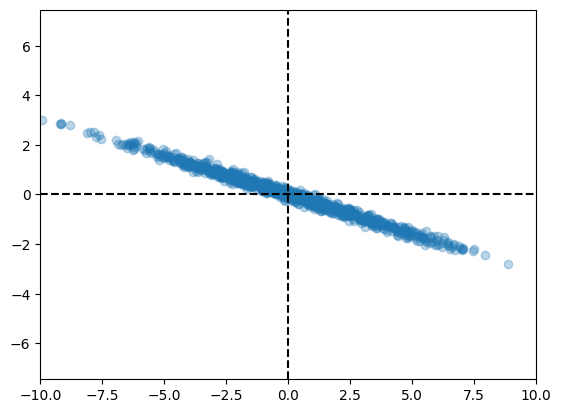

In [ ]:
# Data visualization
plt.scatter(X[0], X[1], alpha = 0.3)
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')

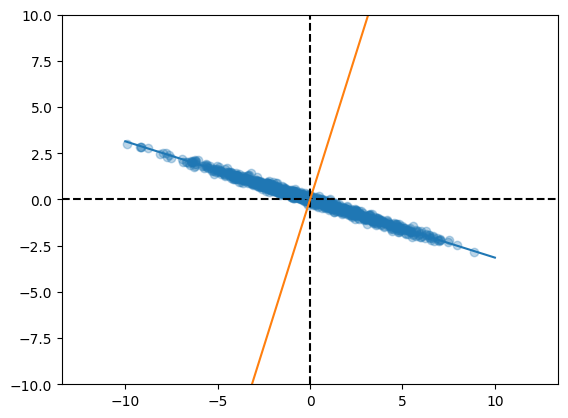

In [ ]:
# PCA
X = X - X.mean(axis = 1).reshape(2, 1)
C = X @ X.T / n
eigval, eigvec = np.linalg.eigh(C)
eigval
w_1, w_2 = eigvec[:, -1], eigvec[:, 0]

# PCA visualization
plt.scatter(X[0], X[1], alpha = 0.3)
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')
# PCs
plt.plot(np.linspace(-10, 10), w_1[1] / w_1[0] * np.linspace(-10, 10))
plt.plot(np.linspace(-10, 10), w_2[1] / w_2[0] * np.linspace(-10, 10))

In [ ]:
# MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

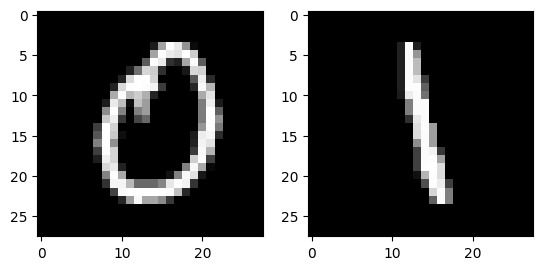

In [ ]:
# Visualising the dataset
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(x_train[y_train == 0][15])
plt.subplot(1, 2, 2)
plt.imshow(x_train[y_train == 1][15])

In [ ]:
# Preparing the dataset
X_0 = x_train[y_train == 0][:1000]
X_1 = x_train[y_train == 1][:1000]
X = np.concatenate((X_0.reshape(-1, 784), X_1.reshape(-1, 784)),
               axis = 0).T

X = np.float64(X)
d, n = X.shape


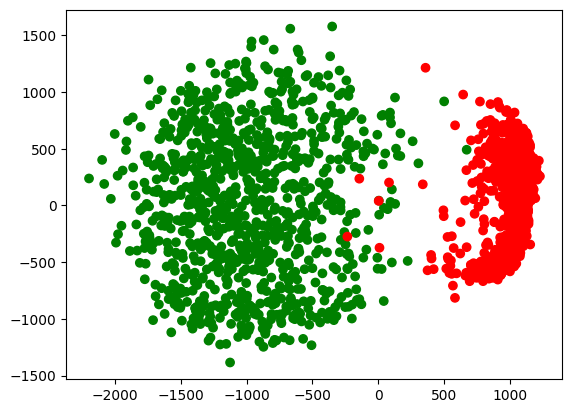

In [ ]:
# PCA
X -= X.mean(axis = 1).reshape(-1, 1)
C = X @ X.T / n
eigval, eigvec = np.linalg.eigh(C)
W = np.concatenate((eigvec[:, -1].reshape(-1, 1),
                    eigvec[:, -2].reshape(-1, 1)),
                    axis = 1)

P = W.T @ X # project the dataset onto the top two PCs
plt.scatter(P[0], P[1], c = ['green'] * 1000 + ['red'] * 1000)